<a href="https://colab.research.google.com/github/hananedjellouadji/GMC_AI/blob/main/cp_ML_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

In [ ]:
ds=pd.read_csv('CC GENERAL.csv')
ds=ds.drop("CUST_ID",axis=1)
ds.fillna(0, inplace=True)
ds

In [ ]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
clust_labels=model.fit_predict(ds)
agg=pd.DataFrame(clust_labels)
agg

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(ds['CREDIT_LIMIT'],ds['PURCHASES_FREQUENCY'],c=agg[0],s=50)
ax.set_title('Agglomerative hierarchical Clustering')
ax.set_xlabel('Cash advance frequency')
ax.set_ylabel('Purchases frequency')
plt.colorbar(scatter)

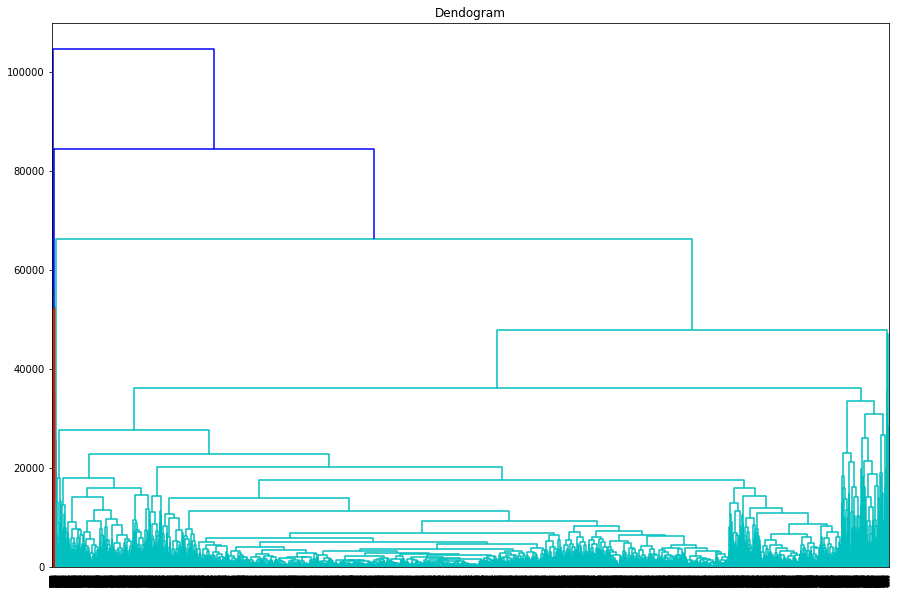

In [42]:
plt.figure(figsize=(15,10))
plt.title('Dendogram')
dendo=shc.dendrogram(shc.linkage(ds,method='complete'))

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(ds)
labels=pd.DataFrame(kmeans.labels_)
labels

In [ ]:
kmeans=KMeans(n_clusters=10,random_state=0)
kmeans.fit(ds)
labels=pd.DataFrame(kmeans.labels_)
labels

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(ds)
labels=pd.DataFrame(kmeans.labels_)
labels
#this is the best choice
#apparently 5 is the max nbr of clusters

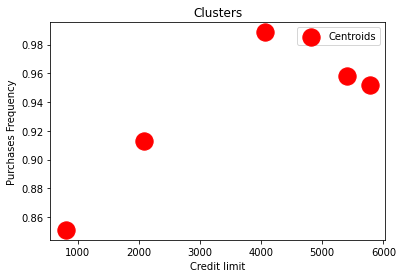

In [56]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Clusters')
plt.xlabel('Credit limit')
plt.ylabel('Purchases Frequency')
plt.legend()
plt.show()